# Sprint 15, Task 1

## Level 1

### Exercise 1

Classify the different flights using the K-means algorithm:

In [1]:
# Import useful libraries:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from kneed import KneeLocator

In [2]:
# Open Dataset:

dades = pd.read_csv("../Sprint 11/DelayedFlights.csv")

# Feature filtering: first we eliminate columns that do not tell us much information about flight delays

dades.drop(columns=["Unnamed: 0", "Year", "FlightNum", "TailNum", "Cancelled", "CancellationCode"], inplace=True)

# Since we are going to use PCA, we only want continous numerical values, which will gave maximum explanation potential

# Then we filter out variables that are not continuous numerical:

dades.drop(columns=["Month", "DayofMonth", "DayOfWeek", "UniqueCarrier", "Origin", "Dest", "Diverted"], inplace=True)


In [3]:
##################################################################################################################
###################################### FILLING IN NULL VALUES ####################################################

In [4]:
# Arrival Delay: NaN cases filled with Departure Delay value

dades["ArrDelay"].fillna(dades["DepDelay"], inplace = True)

# Arrival Time: NaN cases filled with Scheduled Arrival Time + Arrival Delay

foo = dades["CRSArrTime"] + dades["ArrDelay"]

dades["ArrTime"].fillna(foo, inplace = True)           


In [5]:
# Scheduled Elapsed Time: NaN values filled with Scheduled Arrival Time - Scheduled Departure Time

    # Function that will calculate new value:
    
def calc_time(first, second):
    result = first - second
    for i in result:
        if i < 0:
            i =+ 2400
    return result

dades["CRSElapsedTime"].fillna(calc_time(dades["CRSArrTime"], dades["CRSDepTime"]), inplace=True)

# Actual Elapsed Time: NaN values filled with Scheduled Elapsed Time + Arrival Delay

calculate = dades["CRSElapsedTime"] + dades["ArrDelay"]

dades["ActualElapsedTime"].fillna(calculate, inplace=True)


In [6]:
# Taxi In and Out: NaN values filled in with column mean

dades["TaxiIn"].fillna(dades["TaxiIn"].mean(), inplace=True)

dades["TaxiOut"].fillna(dades["TaxiOut"].mean(), inplace=True)

# Air Time: NaN values filled with Actual Elapsed Time - Taxi Time

fum = dades["ActualElapsedTime"] - dades["TaxiIn"] - dades["TaxiOut"]

dades["AirTime"].fillna(fum, inplace=True)

In [7]:
# Specific reasons for Delay: filled in with 0

dades["CarrierDelay"].fillna(0, inplace=True)

dades["WeatherDelay"].fillna(0, inplace=True)

dades["NASDelay"].fillna(0, inplace=True)

dades["SecurityDelay"].fillna(0, inplace=True)

dades["LateAircraftDelay"].fillna(0, inplace=True)

In [8]:
dades.isnull().sum()

DepTime              0
CRSDepTime           0
ArrTime              0
CRSArrTime           0
ActualElapsedTime    0
CRSElapsedTime       0
AirTime              0
ArrDelay             0
DepDelay             0
Distance             0
TaxiIn               0
TaxiOut              0
CarrierDelay         0
WeatherDelay         0
NASDelay             0
SecurityDelay        0
LateAircraftDelay    0
dtype: int64

In [9]:
# Scale from 0 to 1:

scaler = MinMaxScaler()

scaled_df = scaler.fit_transform(dades)

scaled_df = pd.DataFrame(scaled_df)

In [10]:
# PCA transformation to 2 elements:

pca = PCA(n_components=2)

principalComponents = pca.fit_transform(scaled_df)

new_df = pd.DataFrame(data = principalComponents)

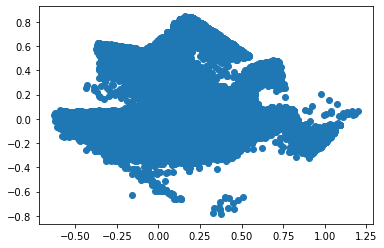

In [11]:
# See scatterplot after PCA transformation: 

plt.scatter(new_df[0], new_df[1])

In [12]:
# K-means algorithm: set hyperparameters, fit and predict; intuitively choose 6 clusters given scatterplot shape

kmeans = KMeans(init="random", n_clusters=6, random_state=59)

labels = kmeans.fit_predict(new_df)

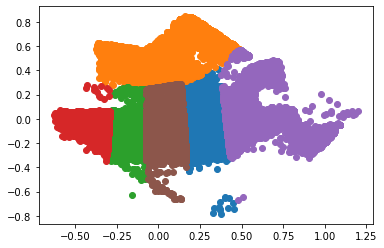

In [13]:
# Getting array with labels:
 
u_labels = np.unique(labels)
 
# Then plotting the results:
 
for i in u_labels:
    filtered_label = new_df[labels == i]
    plt.scatter(filtered_label[0] , filtered_label[1])

# It seems to have found groups on the extremities of the figure (top, right and left), but the central groupings
# look unintuitive. In fact, when changing the number of centroids those clusters remain (conceptually) unchanged.

In [14]:
# Silhouette has not been applied because of its high computational burden; we will try elbow method instead

In [15]:
# Elbow method calculations:

sse = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, max_iter= 300, random_state= 88)
    kmeans.fit(new_df)
    sse.append(kmeans.inertia_)

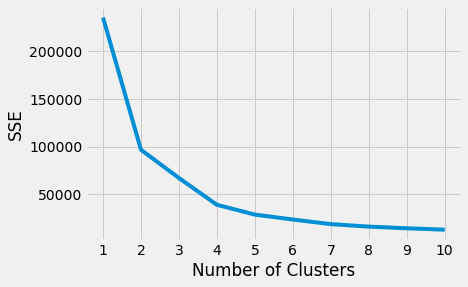

In [16]:
# Plot results:

plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

# Elbow method shows 2 or 4 might be the best result. Let us use Knee Locator instead for a clearer insight

In [17]:
kl = KneeLocator(range(1, 11), sse, curve="convex", direction="decreasing")

kl.elbow

# 4 is the best number of clusters

4

In [18]:
# Now running with 4 clusters:

kmeans = KMeans(init="random", n_clusters=4, random_state=14)

labels = kmeans.fit_predict(new_df)

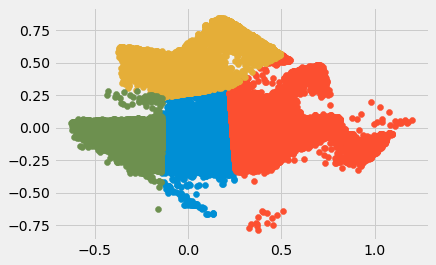

In [19]:
# Now we plot:

u_labels = np.unique(labels)
 
for i in u_labels:
    filtered_label = new_df[labels == i]
    plt.scatter(filtered_label[0] , filtered_label[1])
    
# It looks fundamentally better in theoretical terms than 6 clusters model

In [20]:
# For the continuation of the exercise, see S15 T01 P2

In [21]:
###################################################################################################################